In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
datos = pd.read_csv('data/AirPassengers.csv')

In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [14]:
#Transformación del eje temporal
datos['Month'] = pd.to_datetime(datos['Month'], format='%Y-%m')
datos.set_index('Month', inplace=True)
datos.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


Gráfico de la serie:

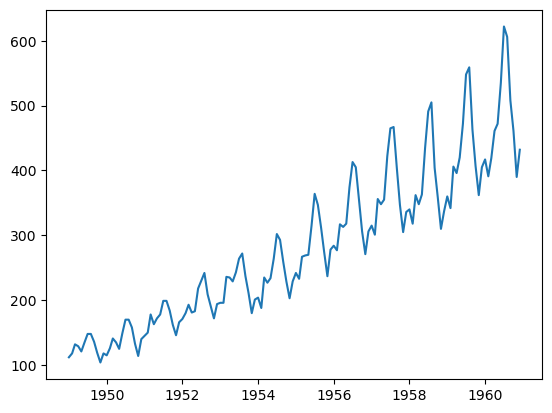

In [17]:
plt.plot(datos)
plt.show()

Se evidencia que la serie no es estacionaria. La media aumenta y las amplitudes también.

Por esto, hay que descomponer la serie:

- Tendencia

- Patrón Cíclico

- Aleatoriedad

In [18]:
descompocision = seasonal_decompose(datos, model='multiplicative')
tendencia = descompocision.trend
patron_ciclico = descompocision.seasonal
aleatoriedad = descompocision.resid

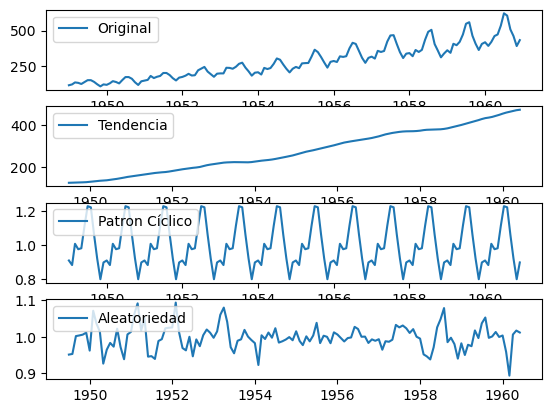

In [21]:
plt.subplot(411)
plt.plot(datos, label='Original')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(tendencia, label = 'Tendencia')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(patron_ciclico, label='Patron Cíclico')
plt.legend(loc = 'upper left')

plt.subplot(414)
plt.plot(aleatoriedad, label='Aleatoriedad')
plt.legend(loc = 'upper left')

plt.show()